In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from matplotlib import pyplot as plt # for plotting graphs
import seaborn # statistical data visualization library
from functools import cmp_to_key

from sklearn import metrics
import math
import tensorflow as tf
from tensorflow.python.data import Dataset

tf.logging.set_verbosity(tf.logging.ERROR)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input/"))
print(os.listdir("./"))

# Any results you write to the current directory are saved as output.

['.ipynb_checkpoints', 'housing_price_prediction_eda_simple_regression.ipynb', 'house-prices-dnn.ipynb', 'input']


## Examine the data first

In [2]:
# load the train.csv file
df = pd.read_csv('./input/train.csv')
df = df.reindex()
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [3]:
df_test = pd.read_csv('./input/test.csv')
df_test.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


List all fields in the DataFrame:

In [4]:
print('total fields = %d' % (len(df.keys())))
print('fields = %s' % (df.keys()))

total fields = 81
fields = Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
     

Looks like non-numerical fields didn't show in describe(), like MSZoning, Street, Alley, ...

Draw histogram to show relationship between feature and target:

In [5]:
def min2(l, default = 0.0):
    if len(l) == 0:
        return default
    else:
        return min(l)

def max2(l, default = 0.0):
    if len(l) == 0:
        return default
    else:
        return max(l)

def avg2(l, default = 0.0):
    if len(l) == 0:
        return default
    else:
        return float(sum(l)) / float(len(l))

def std2(l, default = 0.0):
    if len(l) == 0:
        return default
    else:
        return np.std(l)

def histogram_for_non_numerical_series(s):
    d = {}
    for v in s:
        d[v] = d.get(v, 0) + 1
    bin_s_label = list(d.keys())
    bin_s_label.sort()
    bin_s = list(range(0, len(bin_s_label)))
    hist_s = [d[v] for v in bin_s_label]
    bin_s.append(len(bin_s))
    bin_s_label.insert(0, '_')
    return (hist_s, bin_s, bin_s_label)
    
def plot_hist_with_target3(plt, df, feature, target, histogram_bins = 10):
    # reference:
    #    https://stackoverflow.com/questions/33328774/box-plot-with-min-max-average-and-standard-deviation
    #    https://matplotlib.org/gallery/api/two_scales.html 
    #    https://matplotlib.org/1.2.1/examples/pylab_examples/errorbar_demo.html
    #    https://matplotlib.org/2.0.0/examples/color/named_colors.html
    #    https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xticks.html
    title = feature
    plt.title(title)
    s = df[feature]
    t = df[target]
    t_max = max(t)
    # get histogram of the feature
    bin_s_label = None
    # fillna with 0.0 or '_N/A_'
    na_cnt = sum(s.isna())
    if na_cnt > 0:
        if True in [type(_) == str for _ in s]:
            print('found %d na in string field %s' % (na_cnt, feature))
            s = s.fillna('_N/A_')
        else:
            print('found %d na in numerical field %s' % (na_cnt, feature))
            s = s.fillna(-1.0)
    try:
        hist_s, bin_s = np.histogram(s, bins = histogram_bins)
    except Exception as e:
        # print('ERROR: failed to draw histogram for %s: %s: %s' % (name, type(e).__name__, str(e)))
        hist_s, bin_s, bin_s_label = histogram_for_non_numerical_series(s)
        # return
    # histogram of target by distribution of feature
    hist_t_by_s_cnt = [0] * (len(bin_s) - 1)
    hist_t_by_s = [] 
    for i in range(0, (len(bin_s) - 1)):
        hist_t_by_s.append([])
    # get target histogram for numerical feature
    if bin_s_label is None:
        for (sv, tv) in zip(s, t):
            pos = 0
            for i in range(0, len(bin_s) - 1):
                if sv >= bin_s[i]:
                    pos = i
            hist_t_by_s_cnt[pos] += 1
            hist_t_by_s[pos].append(tv)
    else:
        for (sv, tv) in zip(s, t):
            pos = bin_s_label.index(sv) - 1
            hist_t_by_s_cnt[pos] += 1
            hist_t_by_s[pos].append(tv)
        # count avg, to re-sort bin_s and bin_s_label by avg
        hist_t_by_s_avg = [float(avg2(n)) for n in hist_t_by_s]
        # hist_t_by_s_std = [float(std2(n)) for n in hist_t_by_s]
        # hist_t_by_s_adj = list(np.array(hist_t_by_s_avg) + np.array(hist_t_by_s_std))
        hist_t_by_s_adj = hist_t_by_s_avg
        # print('before sort:\n%s\n%s\n%s' % (bin_s, bin_s_label, hist_t_by_s_adj))
        bin_hist_label = list(zip(bin_s[1:], hist_t_by_s_adj, bin_s_label[1:]))
        bin_hist_label.sort(key = cmp_to_key(lambda x, y: x[1] - y[1]))
        (bin_s, hist_t_by_s_adj, bin_s_label) = zip(*bin_hist_label)
        bin_s = list(bin_s)
        hist_t_by_s_adj = list(hist_t_by_s_adj)
        bin_s_label = list(bin_s_label)
        bin_s.insert(0, 0)
        bin_s_label.insert(0, '_')
        # re-arrange hist_s and hist_t_by_s
        hist_s_new = []
        hist_t_by_s_new = []
        for i in bin_s[1:]:
            hist_s_new.append(hist_s[i - 1])
            hist_t_by_s_new.append(hist_t_by_s[i - 1])
        hist_s = hist_s_new
        hist_t_by_s = hist_t_by_s_new
        # print('after sort:\n%s\n%s\n%s' % (bin_s, bin_s_label, hist_t_by_s_adj))
        # reset bin_s's ordering
        bin_s.sort()
    hist_s = list(hist_s)
    if len(hist_s) < len(bin_s):
        hist_s.insert(0, 0.0)
    hist_s_max = max(hist_s)
    plt.fill_between(bin_s, hist_s, step = 'mid', alpha = 0.5, label = feature)
    if bin_s_label is not None:
        plt.xticks(bin_s, bin_s_label)
    plt.xticks(rotation = 90)
    # just to show legend for ax2
    # plt.errorbar([], [], yerr = [], fmt = 'ok', lw = 3, ecolor = 'sienna', mfc = 'sienna', label = target)
    plt.legend(loc = 'upper right')
    hist_t_by_s = list(hist_t_by_s)
    if len(hist_t_by_s) < len(bin_s):
        hist_t_by_s.insert(0, [0.0])
    hist_t_by_s_min = [float(min2(n)) for n in hist_t_by_s]
    hist_t_by_s_max = [float(max2(n)) for n in hist_t_by_s]
    hist_t_by_s_avg = [float(avg2(n)) for n in hist_t_by_s]
    hist_t_by_s_std = [float(std2(n)) for n in hist_t_by_s]
    hist_t_by_s_err = [np.array(hist_t_by_s_avg) - np.array(hist_t_by_s_min), np.array(hist_t_by_s_max) - np.array(hist_t_by_s_avg)]
    plt.xlabel(feature)
    plt.ylabel('Count')
    ax2 = plt.twinx()
    ax2.grid(False)
    ax2.errorbar(bin_s, hist_t_by_s_avg, yerr = hist_t_by_s_err, fmt='.k', lw = 1, ecolor = 'sienna')
    ax2.errorbar(bin_s, hist_t_by_s_avg, yerr = hist_t_by_s_std, fmt='ok', lw = 3, ecolor = 'sienna', mfc = 'sienna', label = target)
    ax2.set_ylabel(target)
    plt.legend(loc = 'upper left')
    plt.tight_layout()


found 259 na in numerical field LotFrontage
found 1369 na in string field Alley
found 8 na in string field MasVnrType
found 8 na in numerical field MasVnrArea
found 37 na in string field BsmtQual
found 37 na in string field BsmtCond
found 38 na in string field BsmtExposure
found 37 na in string field BsmtFinType1
found 38 na in string field BsmtFinType2
found 1 na in string field Electrical
found 690 na in string field FireplaceQu
found 81 na in string field GarageType
found 81 na in numerical field GarageYrBlt
found 81 na in string field GarageFinish
found 81 na in string field GarageQual
found 81 na in string field GarageCond
found 1453 na in string field PoolQC
found 1179 na in string field Fence
found 1406 na in string field MiscFeature


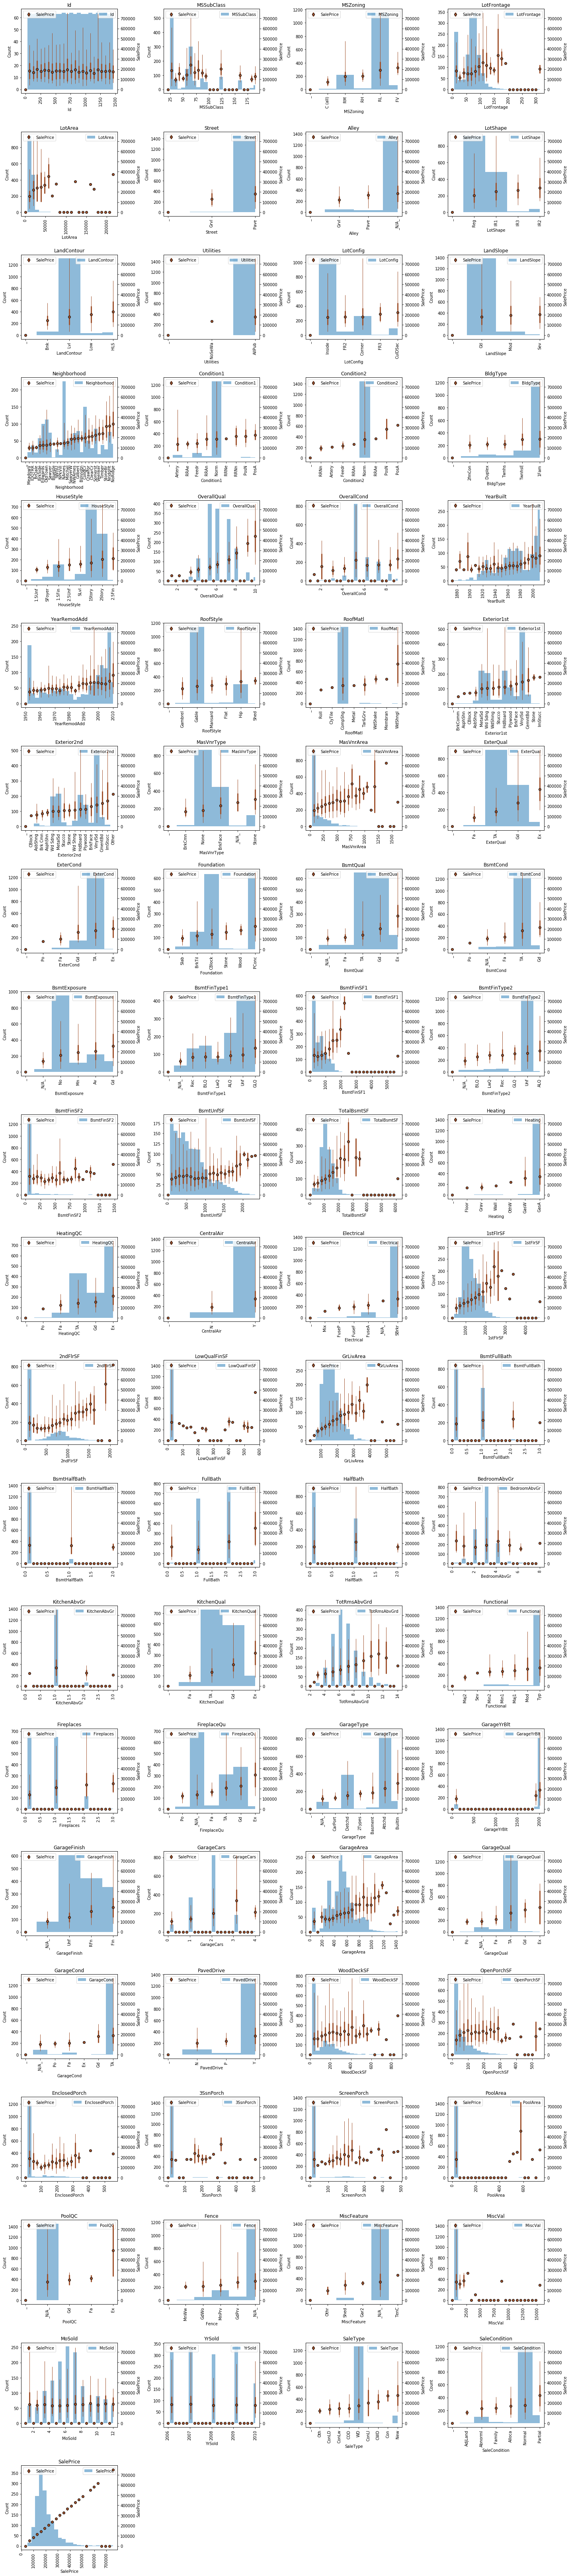

In [6]:
plt.figure(figsize = (20, 90))
i = 1
for name in df.keys():
    plt.subplot(21, 4, i)
    plot_hist_with_target3(plt, df, name, 'SalePrice', histogram_bins = 'rice')
    i += 1
plt.tight_layout()

Check correlation matrix

In [7]:
df.corr()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


Check heatmap:

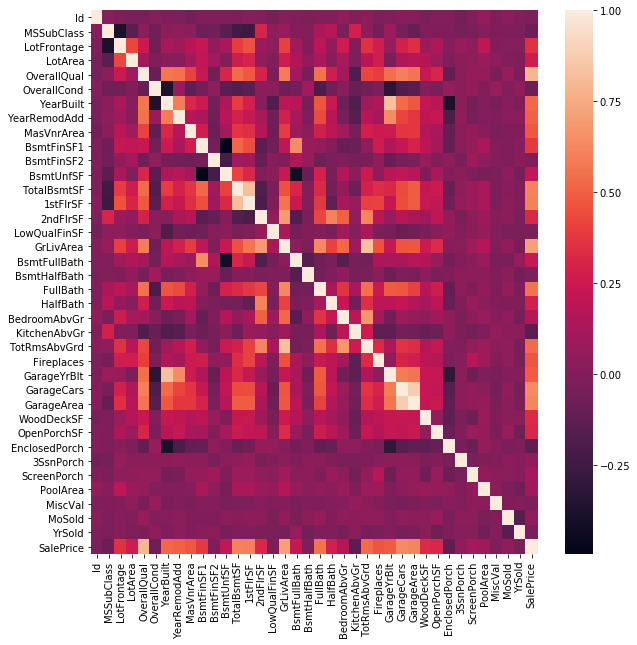

In [8]:
plt.figure(figsize = (10, 10))
seaborn.heatmap(df.corr())

Some features have stronger relationship with SalePrice:
- Numerical features:
  - OverallQual
  - BsmtFinSF1
  - BsmtUnfSF
  - TotalBsmtSF
  - 1stFlrSF
  - 2ndFlrSF
  - GrLivArea
  - FullBath
  - GarageCars
  - GarageArea
  - MSSubClass: Looks like it can be negative feature
- Non-numerical features (after sorted by average SalePrice):
  - Neighborhood
  - RoofMatl: Especially for high price house
  - CentralAir: If value is N then it can not be high price
  - Electrical: Similar to CentralAir
  - KitchenQual

Check these features again:

In [9]:
numerical_fields = [
    'OverallQual', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 'MSSubClass'
]

categorical_fields = [
    'Neighborhood', 'RoofMatl', 'CentralAir', 'Electrical', 'KitchenQual'
]

found 1 na in string field Electrical


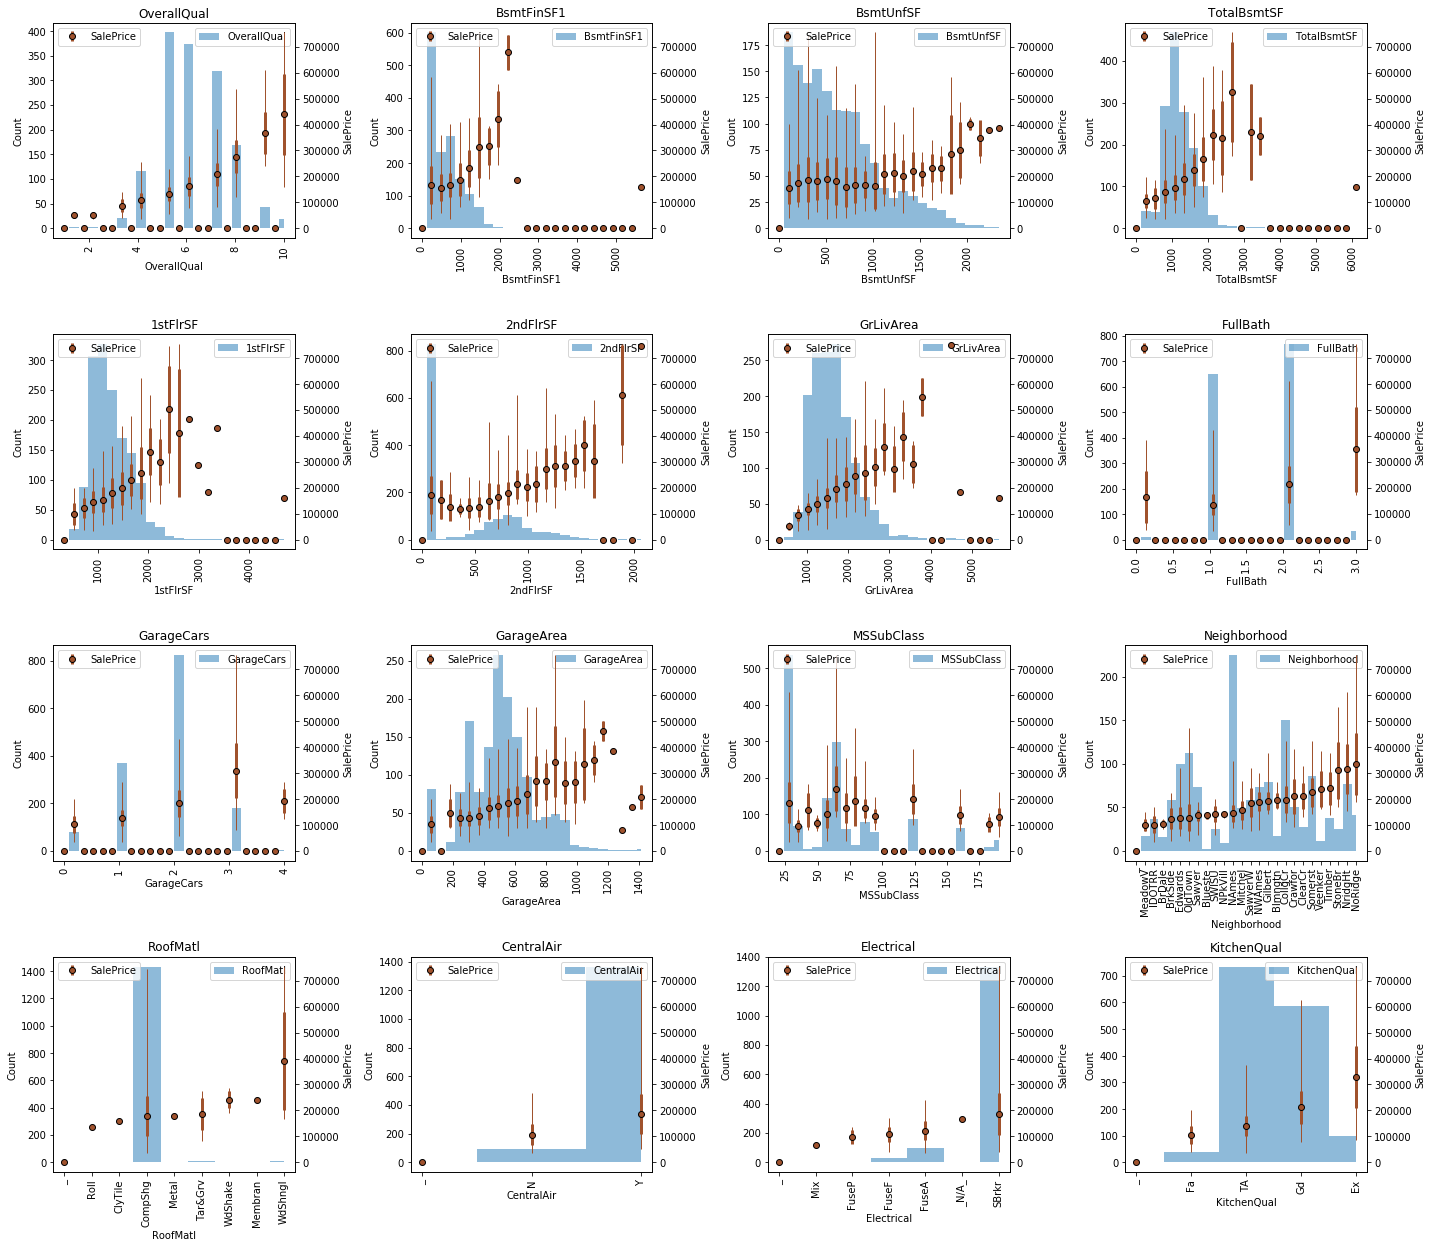

In [10]:

fields = numerical_fields + categorical_fields

plt.figure(figsize = (20, 90))
i = 1
for name in fields:
    plt.subplot(21, 4, i)
    plot_hist_with_target3(plt, df, name, 'SalePrice', histogram_bins = 'rice')
    i += 1
plt.tight_layout()

## Neural Network
Use un-processed numerical features only to see how good can it be.

In [11]:
def log2(n):
    if n <= 0:
        return 0.0
    else:
        return math.log(n)

def get_logged_series(s):
    s1 = [log2(n) for n in s]
    return s1
    
def get_logged_df(df):
    df1 = pd.DataFrame()
    for k in df.keys():
        s1 = get_logged_series(s)
        df1[k] = s1
    return df1

def get_scaled_series(base = 1.0):
    def wrapper_get_scaled_series(s):
        s_max = max(s)
        return [base * float(n) / float(s_max) for n in s]
    return wrapper_get_scaled_series

def get_scaled_df(df, base = 1.0):
    df1 = pd.DataFrame()
    for k in df.keys():
        s = df[k]
        s1 = get_scaled_series(base = base)(s)
        df1[k] = s1
    return df1

def get_dummies(dummy_na = False):
    def wrapper_get_dummies(s):
        df = pd.get_dummies(s, prefix = s.name, dummy_na = dummy_na)
        df1 = pd.DataFrame()
        for k in df.keys():
            s = df[k]
            name = s.name
            name = name.replace('(', '')
            name = name.replace(')', '')
            name = name.replace(' ', '')
            s1 = s.rename(name)
            df1[s1.name] = s1
        return df1
    return wrapper_get_dummies

def convert_features(df, num_fields, cat_fields, num_fields_proc = None, cat_fields_proc = None, label_name = None, train_validate_ratio = None):
    if num_fields_proc is None:
        num_fields_proc = lambda x: x
    if cat_fields_proc is None:
        cat_fields_proc = lambda x: x
    features = pd.DataFrame()
    for k in num_fields:
        features[k] = num_fields_proc(df[k].copy())
    for k in cat_fields:
        features = features.join(cat_fields_proc(df[k].copy()))
    if label_name is not None:
        labels = df[label_name].copy()
    else:
        labels = None
    if train_validate_ratio is None:
        train_validate_ratio = 1
    train_num = int(len(df) * train_validate_ratio)
    validate_num = len(df) - train_num
    train_features = features.head(train_num)
    validate_features = features.tail(validate_num)
    if labels is not None:
        train_labels = labels.head(train_num)
        validate_labels = labels.tail(validate_num)
    else:
        train_labels = None
        validate_labels = None
    return (train_features, train_labels, validate_features, validate_labels)

In [12]:
def construct_feature_columns(input_features):
    """Construct the TensorFlow Feature Columns.

    Args:
    input_features: The names of the numerical input features to use.
    Returns:
    A set of feature columns
    """
    return set([tf.feature_column.numeric_column(my_feature)
                for my_feature in input_features])

def my_input_fn(features, targets, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model.

    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """

    # Convert pandas data into a dict of np arrays.
    # features = {key:np.array(value) for key,value in dict(features).items()}                                            

    #
    # note: can convert to dict directly
    #
    features = dict(features)


    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices((features,targets)) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)

    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(10000)

    # Return the next batch of data.
    features, labels = ds.make_one_shot_iterator().get_next()
    return features, labels

def my_input_fn_pred(features, batch_size=1, shuffle=True, num_epochs=None):
    """Trains a linear regression model.

    Args:
      features: pandas DataFrame of features
      targets: pandas DataFrame of targets
      batch_size: Size of batches to be passed to the model
      shuffle: True or False. Whether to shuffle the data.
      num_epochs: Number of epochs for which data should be repeated. None = repeat indefinitely
    Returns:
      Tuple of (features, labels) for next data batch
    """

    # Convert pandas data into a dict of np arrays.
    # features = {key:np.array(value) for key,value in dict(features).items()}                                            

    #
    # note: can convert to dict directly
    #
    features = dict(features)


    # Construct a dataset, and configure batching/repeating.
    ds = Dataset.from_tensor_slices(features) # warning: 2GB limit
    ds = ds.batch(batch_size).repeat(num_epochs)

    # Shuffle the data, if specified.
    if shuffle:
        ds = ds.shuffle(10000)

    # Return the next batch of data.
    features = ds.make_one_shot_iterator().get_next()
    return features

def train_dnn_regressor_model(
    optimizer,
    steps,
    batch_size,
    hidden_units,
    training_examples,
    training_targets,
    validation_examples,
    validation_targets):
    """Trains a DNN regression model.

    In addition to training, this function also prints training progress information,
    as well as a plot of the training and validation loss over time.

    Args:
    learning_rate: A `float`, the learning rate.
    steps: A non-zero `int`, the total number of training steps. A training step
      consists of a forward and backward pass using a single batch.
    batch_size: A non-zero `int`, the batch size.
    hidden_units: A `list` of int values, specifying the number of neurons in each layer.
    training_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for training.
    training_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for training.
    validation_examples: A `DataFrame` containing one or more columns from
      `california_housing_dataframe` to use as input features for validation.
    validation_targets: A `DataFrame` containing exactly one column from
      `california_housing_dataframe` to use as target for validation.

    Returns:
    A `LinearRegressor` object trained on the training data.
    """
    # RMSE, RMSLE: http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics

    if validation_examples is not None and validation_targets is not None:
        do_validation = True
    else:
        do_validation = False
    
    periods = 10
    steps_per_period = steps / periods

    # Create a linear regressor object.
    dnn_regressor = tf.estimator.DNNRegressor(
        feature_columns=construct_feature_columns(training_examples),
        hidden_units=hidden_units,
        optimizer=optimizer
    )

    # Create input functions.
    training_input_fn = lambda: my_input_fn(training_examples, 
                                            training_targets, 
                                            batch_size=batch_size)
    predict_training_input_fn = lambda: my_input_fn(training_examples, 
                                                    training_targets, 
                                                    num_epochs=1, 
                                                    shuffle=False)
    if do_validation == True:
        predict_validation_input_fn = lambda: my_input_fn(validation_examples, 
                                                          validation_targets, 
                                                          num_epochs=1, 
                                                          shuffle=False)

    # Train the model, but do so inside a loop so that we can periodically assess
    # loss metrics.
    print("Training model...")
    print("RMSE, RMSLE (on training data):")
    training_rmse = []
    validation_rmse = []
    training_rmsle = []
    validation_rmsle = []
    for period in range (0, periods):
        # Train the model, starting from the prior state.
        dnn_regressor.train(
            input_fn=training_input_fn,
            steps=steps_per_period
        )

        # Take a break and compute predictions.
        training_predictions = dnn_regressor.predict(input_fn=predict_training_input_fn)
        training_predictions = np.array([item['predictions'][0] for item in training_predictions])
        
        # Compute training loss RMSE.
        training_root_mean_squared_error = math.sqrt(
            metrics.mean_squared_error(training_targets, training_predictions))

        # Compute training loss RMSLE.
        training_root_mean_squared_log_error = math.sqrt(
            metrics.mean_squared_log_error(training_targets, training_predictions))
        
        if do_validation == True:
            validation_predictions = dnn_regressor.predict(input_fn=predict_validation_input_fn)
            validation_predictions = np.array([item['predictions'][0] for item in validation_predictions])

            # Compute validation loss RMSE.
            validation_root_mean_squared_error = math.sqrt(
                metrics.mean_squared_error(validation_targets, validation_predictions))

            # Compute validation loss RMSLE.
            validation_root_mean_squared_log_error = math.sqrt(
                metrics.mean_squared_log_error(validation_targets, validation_predictions))

        # Occasionally print the current loss.
        print("  period %02d : %0.2f, %0.4f" % (period, training_root_mean_squared_error, training_root_mean_squared_log_error))
        # Add the loss metrics from this period to our list.
        training_rmse.append(training_root_mean_squared_error)
        training_rmsle.append(training_root_mean_squared_log_error)
        if do_validation == True:
            validation_rmse.append(validation_root_mean_squared_error)
            validation_rmsle.append(validation_root_mean_squared_log_error)
 
    print("Model training finished.")
    # Output a graph of loss metrics over periods.
    plt.figure(figsize = (15, 5))
    # RMSE
    plt.subplot(1, 3, 1)
    plt.ylabel("RMSE")
    plt.xlabel("Periods")
    plt.title("Root Mean Squared Error vs. Periods")
    plt.plot(training_rmse, label="training")
    if do_validation == True:
        plt.plot(validation_rmse, label="validation")
    plt.legend()
    # RMSLE
    plt.subplot(1, 3, 2)
    plt.ylabel("RMSLE")
    plt.xlabel("Periods")
    plt.title("Root Mean Squared Logarithmic Error vs. Periods")
    plt.plot(training_rmsle, label="training")
    if do_validation == True:
        plt.plot(validation_rmsle, label="validation")
    plt.legend()
    # Target / Prediction
    plt.subplot(1, 3, 3)
    plt.ylabel("Target")
    plt.xlabel("Prediction")
    plt.title("Target vs. Prediction")
    lim = max(training_targets)
    if do_validation == True:
        lim = max(lim, max(validation_targets))
    lim *= 1.05
    plt.xlim(0, lim)
    plt.ylim(0, lim)
    plt.plot([0, lim], [0, lim], alpha = 0.5, color = 'red')
    plt.scatter(training_predictions, training_targets, alpha = 0.5, label="training")
    if do_validation == True:
        plt.scatter(validation_predictions, validation_targets, alpha = 0.5, label="validation")
    plt.legend()
    plt.tight_layout()
    
    return dnn_regressor


In [13]:
numerical_fields = [
    'OverallQual', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 'MSSubClass'
]

categorical_fields = []


ret = convert_features(df, 
                       numerical_fields, 
                       categorical_fields, 
                       num_fields_proc = None, 
                       cat_fields_proc = get_dummies(dummy_na = True),
                       label_name = 'SalePrice',
                       train_validate_ratio = 0.7)


training_features = ret[0]
training_targets = ret[1]
validation_features = ret[2]
validation_targets = ret[3]

Training model...
RMSE, RMSLE (on training data):
  period 00 : 44949.31, 0.2118
  period 01 : 43502.45, 0.2304
  period 02 : 42273.24, 0.2181
  period 03 : 42220.87, 0.2161
  period 04 : 43298.67, 0.2134
  period 05 : 42123.07, 0.2194
  period 06 : 42748.96, 0.2275
  period 07 : 42031.39, 0.2133
  period 08 : 41898.34, 0.2122
  period 09 : 41761.04, 0.2132
Model training finished.


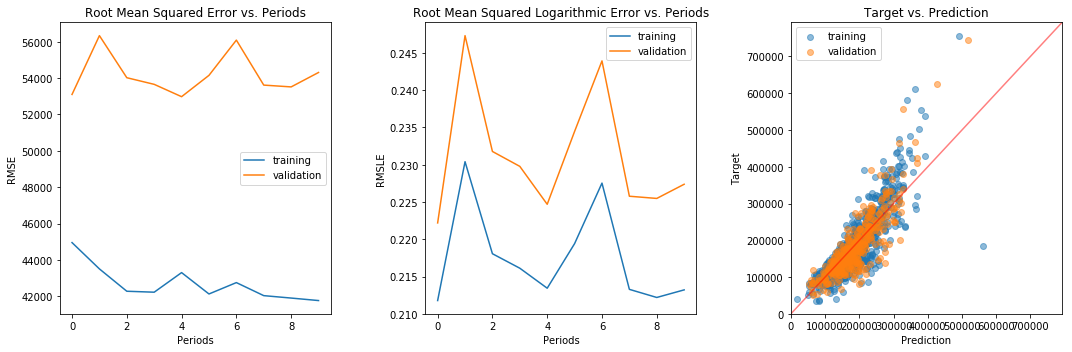

In [14]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer, 5.0)
dnn_regressor = train_dnn_regressor_model(
    optimizer,
    steps=2000,
    batch_size=100,
    hidden_units=[22,44,22,11],
    training_examples=training_features,
    training_targets=training_targets,
    validation_examples=validation_features,
    validation_targets=validation_targets)

From the result, it is underestimation

In [15]:
numerical_fields = [
    'OverallQual', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 'MSSubClass'
]

categorical_fields = []


ret = convert_features(df, 
                       numerical_fields, 
                       categorical_fields, 
                       num_fields_proc = get_scaled_series(base = 1000.0), 
                       cat_fields_proc = get_dummies(dummy_na = True),
                       label_name = 'SalePrice',
                       train_validate_ratio = 0.7)


training_features = ret[0]
training_targets = ret[1]
validation_features = ret[2]
validation_targets = ret[3]
        

Scale all features to 0 ~ 1000

Training model...
RMSE, RMSLE (on training data):
  period 00 : 42809.17, 0.2103
  period 01 : 40018.10, 0.2025
  period 02 : 39645.42, 0.1956
  period 03 : 38655.13, 0.1957
  period 04 : 39538.26, 0.1859
  period 05 : 37264.25, 0.1833
  period 06 : 37010.86, 0.1948
  period 07 : 36695.60, 0.1932
  period 08 : 35811.69, 0.1866
  period 09 : 35184.15, 0.1698
Model training finished.


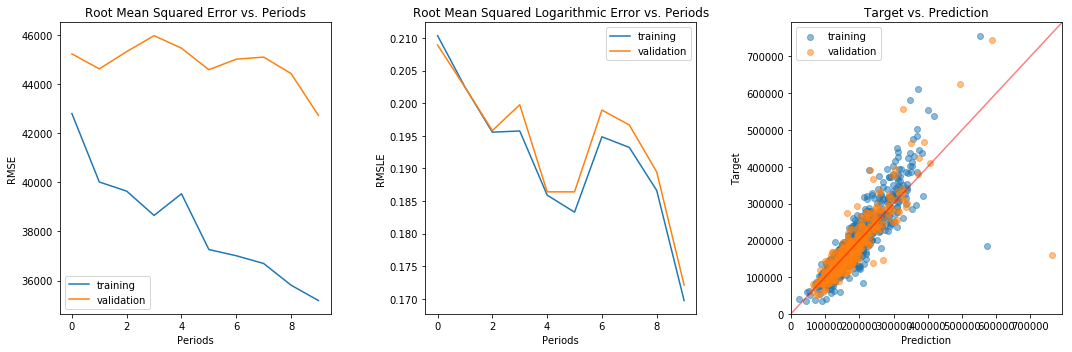

In [16]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer, 5.0)
dnn_regressor = train_dnn_regressor_model(
    optimizer,
    steps=2000,
    batch_size=100,
    hidden_units=[22,44,22,11],
    training_examples=training_features,
    training_targets=training_targets,
    validation_examples=validation_features,
    validation_targets=validation_targets)

Try scale features with log

In [17]:
numerical_fields = [
    'OverallQual', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 'MSSubClass'
]

categorical_fields = []


ret = convert_features(df, 
                       numerical_fields, 
                       categorical_fields, 
                       num_fields_proc = get_logged_series, 
                       cat_fields_proc = get_dummies(dummy_na = True),
                       label_name = 'SalePrice',
                       train_validate_ratio = 0.7)


training_features = ret[0]
training_targets = ret[1]
validation_features = ret[2]
validation_targets = ret[3]
        

Training model...
RMSE, RMSLE (on training data):
  period 00 : 143648.02, 1.0879
  period 01 : 69564.22, 0.3473
  period 02 : 68228.40, 0.3477
  period 03 : 66130.26, 0.3238
  period 04 : 63411.71, 0.3125
  period 05 : 59693.12, 0.3189
  period 06 : 55004.51, 0.2822
  period 07 : 50066.07, 0.2413
  period 08 : 48038.78, 0.2320
  period 09 : 47877.31, 0.2236
Model training finished.


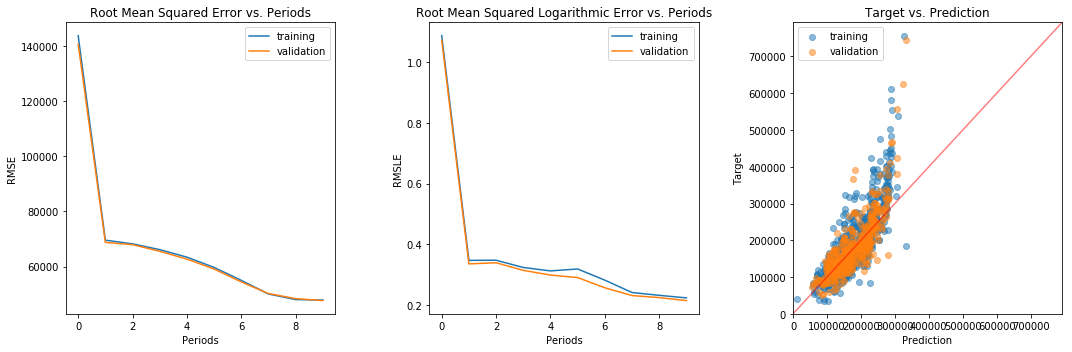

In [18]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer, 5.0)
dnn_regressor = train_dnn_regressor_model(
    optimizer,
    steps=2000,
    batch_size=100,
    hidden_units=[22,44,22,11],
    training_examples=training_features,
    training_targets=training_targets,
    validation_examples=validation_features,
    validation_targets=validation_targets)

Change hidden layer settings

Training model...
RMSE, RMSLE (on training data):
  period 00 : 46687.09, 0.2457
  period 01 : 39260.74, 0.1947
  period 02 : 39588.98, 0.1873
  period 03 : 49107.05, 0.2503
  period 04 : 39726.55, 0.1959
  period 05 : 37312.09, 0.1846
  period 06 : 37876.73, 0.1823
  period 07 : 36518.89, 0.1860
  period 08 : 41325.11, 0.1920
  period 09 : 38100.06, 0.1858
Model training finished.


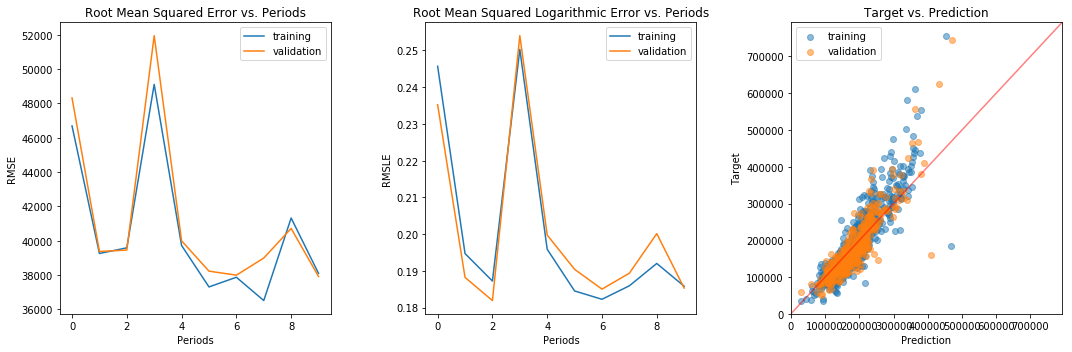

In [ ]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.03)
optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer, 5.0)
dnn_regressor = train_dnn_regressor_model(
    optimizer,
    steps=400000,
    batch_size=2,
    hidden_units=[11,12,13,12,11,3],
    training_examples= training_features,
    training_targets=training_targets,
    validation_examples=validation_features,
    validation_targets=validation_targets)

Use AdagradOptimizer with more iterations, change batch to 10

In [ ]:
optimizer = tf.train.AdagradOptimizer(learning_rate=1.0)
optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer, 5.0)
dnn_regressor = train_dnn_regressor_model(
    optimizer,
    steps=1000000,
    batch_size=10,
    hidden_units=[11,12,13,12,11,3],
    training_examples=training_features,
    training_targets=training_targets,
    validation_examples=validation_features,
    validation_targets=validation_targets)

Training model...
RMSE, RMSLE (on training data):


Add categorical features

In [ ]:
numerical_fields = [
    'OverallQual', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 'MSSubClass'
]

categorical_fields = [
    'Neighborhood','MSZoning','KitchenQual','CentralAir','MasVnrType'
]


ret = convert_features(df, 
                       numerical_fields, 
                       categorical_fields, 
                       num_fields_proc = get_logged_series, 
                       cat_fields_proc = get_dummies(dummy_na = True),
                       label_name = 'SalePrice',
                       train_validate_ratio = 0.7)


training_features = ret[0]
training_targets = ret[1]
validation_features = ret[2]
validation_targets = ret[3]

In [ ]:
optimizer = tf.train.AdagradOptimizer(learning_rate=1.0)
optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer, 5.0)
dnn_regressor = train_dnn_regressor_model(
    optimizer,
    steps=100000,
    batch_size=100,
    hidden_units=[11,12,13,12,11,3],
    training_examples=training_features,
    training_targets=training_targets,
    validation_examples=validation_features,
    validation_targets=validation_targets)

In [ ]:
numerical_fields = [
    'OverallQual', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 'MSSubClass'
]

categorical_fields = [
    'Neighborhood','MSZoning','KitchenQual','CentralAir','MasVnrType'
]

ret = convert_features(df, 
                       numerical_fields, 
                       categorical_fields, 
                       num_fields_proc = get_logged_series, 
                       cat_fields_proc = get_dummies(dummy_na = True),
                       label_name = 'SalePrice',
                       train_validate_ratio = 1.0)

training_features_all = ret[0]
training_targets_all = ret[1]

In [ ]:
optimizer = tf.train.AdagradOptimizer(learning_rate=1.0)
optimizer = tf.contrib.estimator.clip_gradients_by_norm(optimizer, 5.0)
dnn_regressor = train_dnn_regressor_model(
    optimizer,
    steps=100000,
    batch_size=100,
    hidden_units=[11,12,13,12,11,3],
    training_examples=training_features_all,
    training_targets=training_targets_all,
    validation_examples=None,
    validation_targets=None)

In [ ]:
numerical_fields = [
    'OverallQual', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
    '2ndFlrSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea', 'MSSubClass'
]

categorical_fields = [
    'Neighborhood','MSZoning','KitchenQual','CentralAir','MasVnrType'
]

ret = convert_features(df_test, 
                       numerical_fields, 
                       categorical_fields, 
                       num_fields_proc = get_logged_series, 
                       cat_fields_proc = get_dummies(dummy_na = True),
                       label_name = None,
                       train_validate_ratio = 1.0)

test_features = ret[0]

# haneld nan fields
for k in test_features.keys():
    s = test_features[k]
    na_cnt = sum(s.isna())
    if na_cnt > 0:
        test_features[k] = s.fillna(0.0)

predict_test_input_fn = lambda: my_input_fn_pred(test_features,
                                                 num_epochs=1, 
                                                 shuffle=False)

test_predictions = dnn_regressor.predict(input_fn=predict_test_input_fn)
df_submit = pd.DataFrame()
df_submit['Id'] = df_test['Id']
df_submit['SalePrice'] = np.array([item['predictions'][0] for item in test_predictions])

df_submit.to_csv('./test_prediction.csv', index = False) 
